In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os.path

# Import API key
from config import weather_api_key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

      
# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
# Perform weather check on each city using a series of successive API calls
# Include a print log of each cit as it is being processed (with the city number and name)
url = "http://api.openweathermap.org/data/2.5/forecast?id=2172797&APPID="
target_url = url + weather_api_key

In [4]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
    
# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
    
print("Done processing through city data.")

Processing record 1 of Set 1 | coffs harbour
Processing record 2 of Set 1 | zacapu
Processing record 3 of Set 1 | jalu
Processing record 4 of Set 1 | khatanga
Processing record 5 of Set 1 | punta arenas
Processing record 6 of Set 1 | chokurdakh
Processing record 7 of Set 1 | ostrovnoy
Record not found
Processing record 8 of Set 1 | armeria
Record not found
Processing record 9 of Set 1 | ribeira grande
Processing record 10 of Set 1 | qaanaaq
Processing record 11 of Set 1 | bluff
Record not found
Processing record 12 of Set 1 | kruisfontein
Processing record 13 of Set 1 | mataura
Processing record 14 of Set 1 | cacule
Processing record 15 of Set 1 | bathsheba
Processing record 16 of Set 1 | guatire
Processing record 17 of Set 1 | rikitea
Processing record 18 of Set 1 | chuy
Processing record 19 of Set 1 | shimoda
Processing record 20 of Set 1 | kropotkin
Processing record 21 of Set 1 | marienburg
Processing record 22 of Set 1 | simpang empat
Processing record 23 of Set 1 | cherskiy
Proce

Processing record 190 of Set 1 | hilo
Processing record 191 of Set 1 | el alto
Processing record 192 of Set 1 | ilulissat
Processing record 193 of Set 1 | mulege
Processing record 194 of Set 1 | san vicente
Processing record 195 of Set 1 | hobyo
Processing record 196 of Set 1 | tilichiki
Processing record 197 of Set 1 | kaitangata
Processing record 198 of Set 1 | hit
Record not found
Processing record 199 of Set 1 | beloha
Processing record 200 of Set 1 | mount isa
Processing record 201 of Set 1 | constitucion
Processing record 202 of Set 1 | inirida
Processing record 203 of Set 1 | dingle
Processing record 204 of Set 1 | bubaque
Processing record 205 of Set 1 | tezu
Processing record 206 of Set 1 | kuytun
Record not found
Processing record 207 of Set 1 | chapais
Processing record 208 of Set 1 | cooma
Processing record 209 of Set 1 | sinnamary
Processing record 210 of Set 1 | wonthaggi
Processing record 211 of Set 1 | los llanos de aridane
Processing record 212 of Set 1 | nouadhibou
Pr

Processing record 380 of Set 1 | sistranda
Processing record 381 of Set 1 | leh
Processing record 382 of Set 1 | glens falls
Processing record 383 of Set 1 | ponta do sol
Processing record 384 of Set 1 | pervoavgustovskiy
Processing record 385 of Set 1 | kokopo
Processing record 386 of Set 1 | mont-dore
Processing record 387 of Set 1 | antofagasta
Processing record 388 of Set 1 | mbekenyera
Processing record 389 of Set 1 | staryy nadym
Processing record 390 of Set 1 | maxixe
Processing record 391 of Set 1 | bandar-e lengeh
Processing record 392 of Set 1 | gotsu
Processing record 393 of Set 1 | ati
Processing record 394 of Set 1 | linxia
Processing record 395 of Set 1 | lajas
Processing record 396 of Set 1 | great bend
Processing record 397 of Set 1 | mana
Record not found
Processing record 398 of Set 1 | gumdag
Processing record 399 of Set 1 | lamego
Processing record 400 of Set 1 | chiredzi
Processing record 401 of Set 1 | yumen
Processing record 402 of Set 1 | gao
Processing record 4

In [5]:
#Convert Raw Data to DataFrame
# Export the city data into a .csv & display the data frame
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,
                "Wind Speed":wind_speed,"Cloudiness":cloudiness,
                "Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Coffs Harbour,-30.3000,153.1333,63.45,73,5.35,54,AU,1599436800
1,Zacapú,19.8333,-101.7167,66.63,86,1.43,87,MX,1599436800
2,Jalu,29.0331,21.5482,77.36,54,12.82,0,LY,1599436800
3,Khatanga,71.9667,102.5000,43.38,77,4.09,22,RU,1599436800
4,Punta Arenas,-53.1500,-70.9167,42.71,78,7.58,86,CL,1599436800


In [6]:
# Export the City_Data into a csv
weather_data.to_csv(r'my_weather_data.csv')

In [7]:
#Inspect the data and remove the cities where the humidity > 100%.
one_hund_humid = weather_data.loc[weather_data["Humidity"] == 100,:]

In [8]:
#  Get the indices of cities that have humidity over 100%.
one_hund_humid.head()

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
292,Sirsi,14.6167,74.8500,70.72,100,2.04,75,IN,1599436800
470,Mairang,25.5667,91.6333,62.83,100,4.79,92,IN,1599436800
499,Ordu,40.9086,37.6845,62.71,100,3.89,13,TR,1599436800


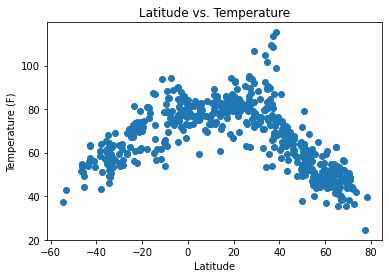

In [9]:
# Plotting the Data
# Latitude vs. Temperature Plot
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)

plt.title('Latitude vs. Temperature')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.savefig('LatVsTemp.png')

plt.show()

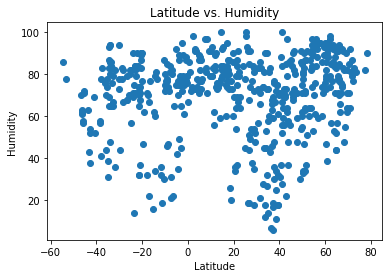

In [10]:
# Latitude vs. Humidity Plot
scatlat = weather_data["Latitude"]
scattemp = weather_data["Humidity"]

plt.scatter(scatlat,scattemp)

plt.title('Latitude vs. Humidity')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('LatVsHumid.png')

plt.show()

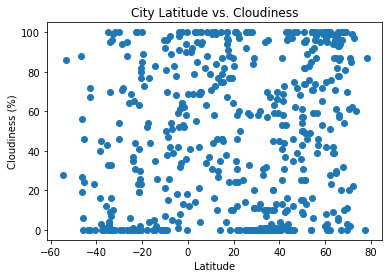

In [11]:
# Latitude vs. Cloudiness Plot
cloud = weather_data["Cloudiness"]

plt.scatter(scatlat,cloud)

plt.title('City Latitude vs. Cloudiness')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('ScatPlotLatVsCloud')

plt.show()

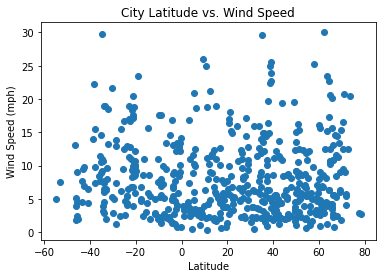

In [12]:
# Latitude vs. Wind Speed Plot
wind = weather_data["Wind Speed"]

plt.scatter(scatlat,wind)

plt.title('City Latitude vs. Wind Speed')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('ScatPlotLatVsWindSpeed')

plt.show()

In [13]:
# Linear Regression
# OPTIONAL: Create a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
    
    plt.annotate (line_eq,text_coordinates,fontsize=14,color="red")
    
    plt.xlabel("Latitude")
    
    plt.ylabel(title)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames

north_df = weather_data.loc[weather_data["Latitude"] >= 0,:]

south_df = weather_data.loc[weather_data["Latitude"] < 0,:]

The r-squared is: -0.7828810530755059


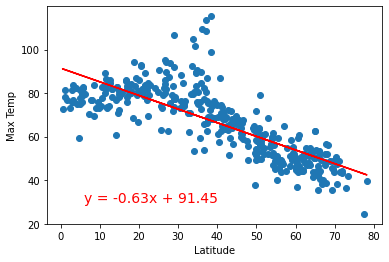

The  r value indicates a  negative correlation between latitude and temperature.


<Figure size 432x288 with 0 Axes>

In [15]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('NortHemMaxTempVsLat')

print("The  r value indicates a  negative correlation between latitude and temperature.")

The r-squared is: 0.7879887416102633


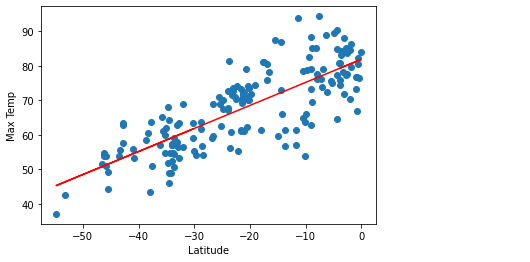

The  r value indicates a  positive correlation between latitude and temperature.


<Figure size 432x288 with 0 Axes>

In [16]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('SouthHemMaxTempVsLat')

print("The  r value indicates a  positive correlation between latitude and temperature.")

The r-squared is: 0.03977007738886756


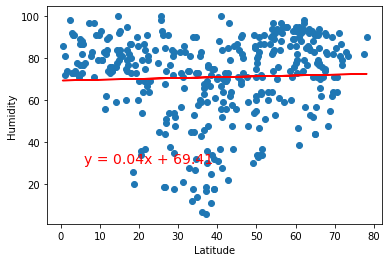

<Figure size 432x288 with 0 Axes>

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('NorthHemHumidVsLatLinReg')

The r-squared is: 0.0299432335333344


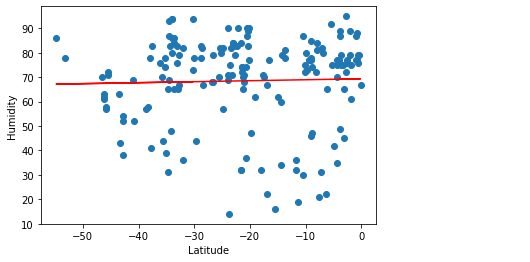

<Figure size 432x288 with 0 Axes>

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('SouthHemHumVsLatLinReg')

The r-squared is: 0.03776751223076372


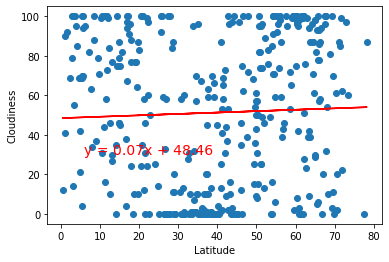

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [19]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('NorthHemCloudVsLatLinReg')
print("The r-value indicates that there is no relationship.")

The r-squared is: 0.22809206526165032


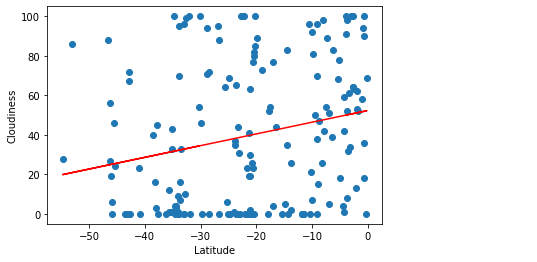

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [20]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('SouthHemCloudVsLatLinReg')
print("The r-value indicates that there is no relationship.")

The r-squared is: 0.05296663649150932


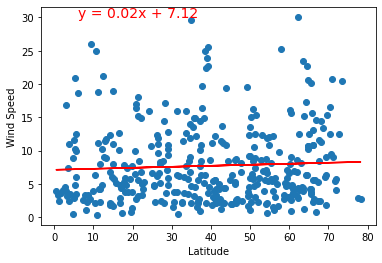

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [21]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('NorthHemWindSpeedVsLatLinReg')
print("The r-value indicates that there is no relationship.")

The r-squared is: -0.10652897464810558


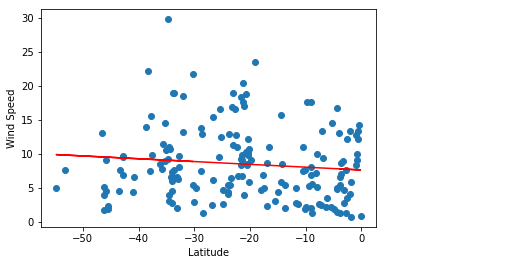

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [22]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('SouthHemWindSpeedVsLatLinReg')
print("The r-value indicates that there is no relationship.")